# Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

### bank client data:
1.  age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

### social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')


## Projects Rubric

Code Review

| Criteria | Meet Expectations |
| :--- | :--- |
| Logistic Regression | Mengimplementasikan Logistic Regression Dengan Scikit-Learn |
| K-Nearest Neighbors | Mengimplementasikan K-Nearest Neighbors Dengan Scikit-Learn |
| Support Vector Machine | Mengimplementasikan Support Vector Machine Dengan Scikit-Learn |
| Decision Tree | Mengimplementasikan Decision Tree Dengan Scikit-Learn |
| Random Forest | Mengimplementasikan Random Forest Dengan Scikit-Learn |
| Naive Bayes | Mengimplementasikan Naive Bayes Dengan Scikit-Learn |
| Confusion Matrix | Mengimpelentasikan Confusion Matrix Regression Dengan Scikit-Learn |
| Visualization | Menganalisa Data Menggunakan Setidaknya 2 Tipe Grafik/Plot. |
| Preprocessing | Melakukan Preproses Dataset Sebelum Melakukan Penelitian Lebih Dalam. |
| Apakah Kode Berjalan Tanpa Ada Eror? | Kode Berjalan Tanpa Ada Eror. Seluruh Kode Berfungsi Dan Dibuat |Dengan Benar.

Readibility

| Criteria | Meet Expectations |
| :--- | :--- |
| Tertata Dengan Baik | Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode. |

Analysis

| Criteria | Meet Expectations |
| :--- | :--- |
| Algorithm Analysis | Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model. |

## Data Preparation

Load the library you need.

In [1]:
# Get your import statement here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
!pip install graphviz  
!pip install pydotplus

In [3]:
# Load your dataset here

bank_add_full = pd.read_csv('dataset/bank-additional-full.csv')
bank_add = pd.read_csv('dataset/bank-additional.csv')
bank_full = pd.read_csv('dataset/bank-full.csv')
bank = pd.read_csv('dataset/bank.csv')

In [4]:
bank_full.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
bank_full.shape

(45211, 17)

In [6]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


tidak ada nan, tapi kalau dilihat di datanya ada unknown, sedangkan di dokumentasi tidak ada tertulis unknown

In [7]:
# cek persentase isi data tiap kolom tipe object

objek = bank_full.columns[bank_full.dtypes == 'O'] # type data object
for col in objek:
    p = bank_full[col].value_counts(normalize=True)*100
    
    print(col)
    print()
    print(p)
    print('-'*40)

job

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64
----------------------------------------
marital

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64
----------------------------------------
education

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64
----------------------------------------
default

no     98.197341
yes     1.802659
Name: default, dtype: float64
----------------------------------------
housing

yes    55.583818
no     44.416182
Name: housing, dtype: float64
----------------------------------------
loan

no     83.977351
yes    16.022649
Name: loan, dt

- poutcome : drop (mayoritas unknown)
- duration : drop (karena duration didapatkan setelah proses telfon selesai). 

sedangkan unknown lain akan diisi dengan mode

In [8]:
unknown = 'job education contact'.split()
for i in unknown:
    bank_full[i] = np.where(bank_full[i] == 'unknown', bank_full[i].mode(), bank_full[i])

for i in unknown:
    print(i)
    print(bank_full[i].value_counts(normalize=True))
    print()

job
blue-collar      0.221627
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
Name: job, dtype: float64

education
secondary    0.554268
tertiary     0.294198
primary      0.151534
Name: education, dtype: float64

contact
cellular     0.935724
telephone    0.064276
Name: contact, dtype: float64



no     39922
yes     5289
Name: y, dtype: int64


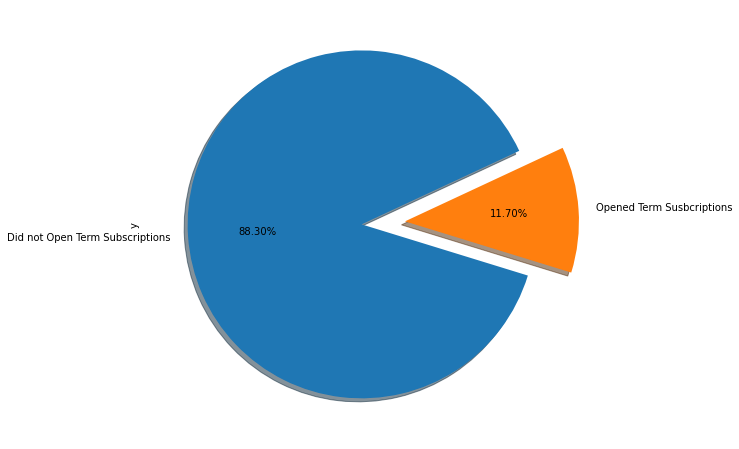

In [9]:
bank_p = bank_full.y.value_counts()
print(bank_p)

labels ="Did not Open Term Subscriptions", "Opened Term Susbcriptions"
bank_p.plot(kind = "pie",
            labels=labels,
            explode=[0,0.25],
            figsize =(8,8),
            autopct='%1.2f%%',
            shadow=True,
            startangle=25)

plt.show()

lebih banyak no dari pada yes

> ## Job vs Subscription

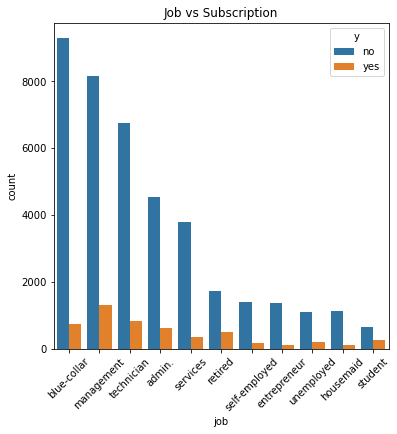

In [10]:
plt.figure(figsize =(6,6))
sns.countplot(x='job', hue="y", data=bank_full, order =bank_full.job.value_counts().index)
plt.xticks(rotation=45)
plt.title('Job vs Subscription')
plt.show()

Management, techinician dan blue-collar lebih banyak yang subscribed dengan yang terbanyak subscribed ada di management. Namun, rasio penawaran diterima lebih banyak pada student dan retired.


> ## Education

Text(0.5, 1.0, 'Education')

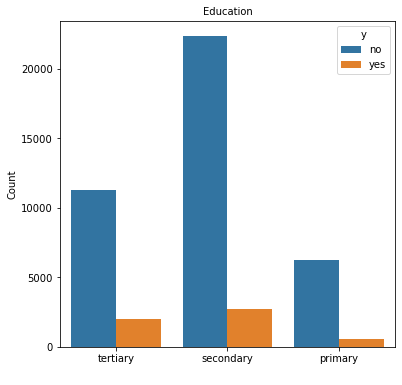

In [11]:
plt.figure(figsize =(6,6))
sns.countplot(x = 'education', hue='y', data = bank_full)
plt.xlabel(' ')
plt.ylabel('Count', fontsize=10)
plt.title('Education', fontsize=10)

Nasabah paling banyak berpendidikan secondary, namun rasio subscribe tertingi ada di tertiary.

# Data Cleaning

In [12]:
bank_full.y = np.where(bank_full['y'] == 'yes', 1, 0)

In [13]:
bank1 =  bank_full.copy()
bank1.drop(['poutcome', 'duration'], axis=1, inplace = True)

In [14]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.0+ MB


### Encode

In [15]:
# karena datanya berbentuk text, kita encoding dulu
encode = 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'education', 'month'
encoder0 = LabelEncoder()
for i in encode:
    bank1[i] = encoder0.fit_transform(bank1[i])
    
bank1

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        0   
1       44    9        2          1        0       29        1     0        0   
2       33    2        1          1        0        2        1     1        0   
3       47    1        1          1        0     1506        1     0        0   
4       33    1        2          1        0        1        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  campaign  pdays  previous  y  
0        5      8         1     -1         0  0  
1        5      8         1     -1         0  0  
2        5      8         1     -1         0  0  
3        5      8         1     -1         0  0  
4        5      8         1     -1         0  0  
...    ...    ...       ...    ...       ... ..  
45206   17      9         3     -1         0  1  
45207   17      9         2     -1         0  1  
45208   17      9         5    184         3  1  
45209   17      9         4     -1         0  0  
45210   17      9         2    188        11  0  

[45211 rows x 15 columns]

In [16]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  y          45211 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.6 MB


# Modeling

In [17]:
X = bank1.drop(['y'], axis=1) # fitur
y = bank1['y'] # target

In [18]:
y.shape

(45211,)

In [19]:
state = 2021

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = state)

logit = LogisticRegression(solver="liblinear", random_state=state)
rfc = RandomForestClassifier(random_state=state)
dtc = DecisionTreeClassifier(random_state = state)
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
svm = SVC(random_state = state)

kolom = ['model', 'score'] 
baris = []
list_model = [logit, rfc, dtc, knn, nb, svm]

for i in list_model:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    baris.append([i, score])
    print(i)
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print('-'*40)

df = pd.DataFrame(baris, columns=kolom)
print(df)

LogisticRegression(random_state=2021, solver='liblinear')
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7968
           1       0.36      0.01      0.02      1075

    accuracy                           0.88      9043
   macro avg       0.62      0.50      0.48      9043
weighted avg       0.82      0.88      0.83      9043

Confusion Matrix
[[7952   16]
 [1066    9]]
----------------------------------------
RandomForestClassifier(random_state=2021)
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7968
           1       0.57      0.16      0.25      1075

    accuracy                           0.89      9043
   macro avg       0.73      0.57      0.60      9043
weighted avg       0.86      0.89      0.86      9043

Confusion Matrix
[[7834  134]
 [ 899  176]]
----------------------------------------
DecisionTreeClassifier(random_st

C:\Users\BRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
df.sort_values('score')

model     score
2          DecisionTreeClassifier(random_state=2021)  0.820966
4                                       GaussianNB()  0.829150
3                KNeighborsClassifier(n_neighbors=3)  0.867190
0  LogisticRegression(random_state=2021, solver='...  0.880349
5                             SVC(random_state=2021)  0.881124
1  (DecisionTreeClassifier(max_features='auto', r...  0.885768

## Kesimpulan : 

Dari 6 Model yang dicoba, yang memiliki akurasi paling tinggi adalah Random Forest Classifier. Jadi untuk data ini bisa prediksi melalui metode RFC.

In [22]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7968
           1       0.57      0.16      0.25      1075

    accuracy                           0.89      9043
   macro avg       0.73      0.57      0.60      9043
weighted avg       0.86      0.89      0.86      9043

Confusion Matrix
[[7834  134]
 [ 899  176]]


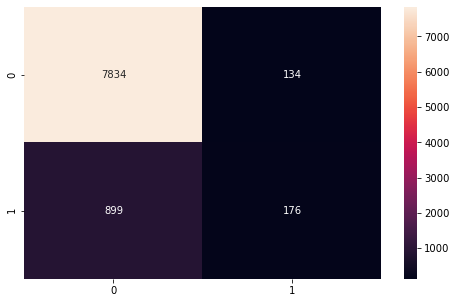

In [23]:
# f, ax = 
plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.show()

In [25]:
from sklearn import tree
plt.figure(figsize=(200,200))
tree_plot = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)